<span style="font-family: monospace; font-size: 16px;">

# 🌱 Individual Carbon Footprint 🌍 <a class="anchor" id="chapter1"></a>

**What is?**

A carbon footprint is the total amount of greenhouse gases (including carbon dioxide and methane) that are generated by our actions.

**Useful source to learn about individual carbon footprint**

https://www.nature.org/en-us/get-involved/how-to-help/carbon-footprint-calculator/

<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExem0xbGt4b2Myd3JzcDd3eGIxamw5Nzh5MjN5aTVlNDlnNTF4M2l5OSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/VI2UC13hwWin1MIfmi/giphy.gif">

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = 'Carbon Emission.csv'
dataset = pd.read_csv(file_path)

<span style="font-family: monospace; font-size: 16px;">

# <span style="font-weight: bold;">Simple EDA ✏️ <a class="anchor" id="chapter2"></a></span>

In [3]:
# Display the first few rows of the dataset
dataset.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [4]:
# Check the general data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [5]:
# Check for duplicates
has_duplicates = dataset.duplicated().any()

if has_duplicates:
    print("Duplicates found in the dataset.")
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [6]:
# Check for missing values
has_missing_values = dataset.isnull().any().any()

if has_missing_values:
    print("Missing values found in the dataset.")
else:
    print("No missing values found in the dataset.")

Missing values found in the dataset.


In [7]:
# Check where exactly (rows) we have missing values
dataset.isnull().sum(axis = 0)

,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,6721
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


We can see that we have missing values if the person does not drive. So, we can replace these values, not delete them.

In [8]:
dataset.replace(np.nan, 'None', inplace=True)

In [9]:
# Check variables' types
dataset.dtypes

,0
Body Type,object
Sex,object
Diet,object
How Often Shower,object
Heating Energy Source,object
Transport,object
Vehicle Type,object
Social Activity,object
Monthly Grocery Bill,int64
Frequency of Traveling by Air,object


In [10]:
# Check the unique values
dataset.nunique()

,0
Body Type,4
Sex,2
Diet,4
How Often Shower,4
Heating Energy Source,4
Transport,3
Vehicle Type,6
Social Activity,3
Monthly Grocery Bill,250
Frequency of Traveling by Air,4


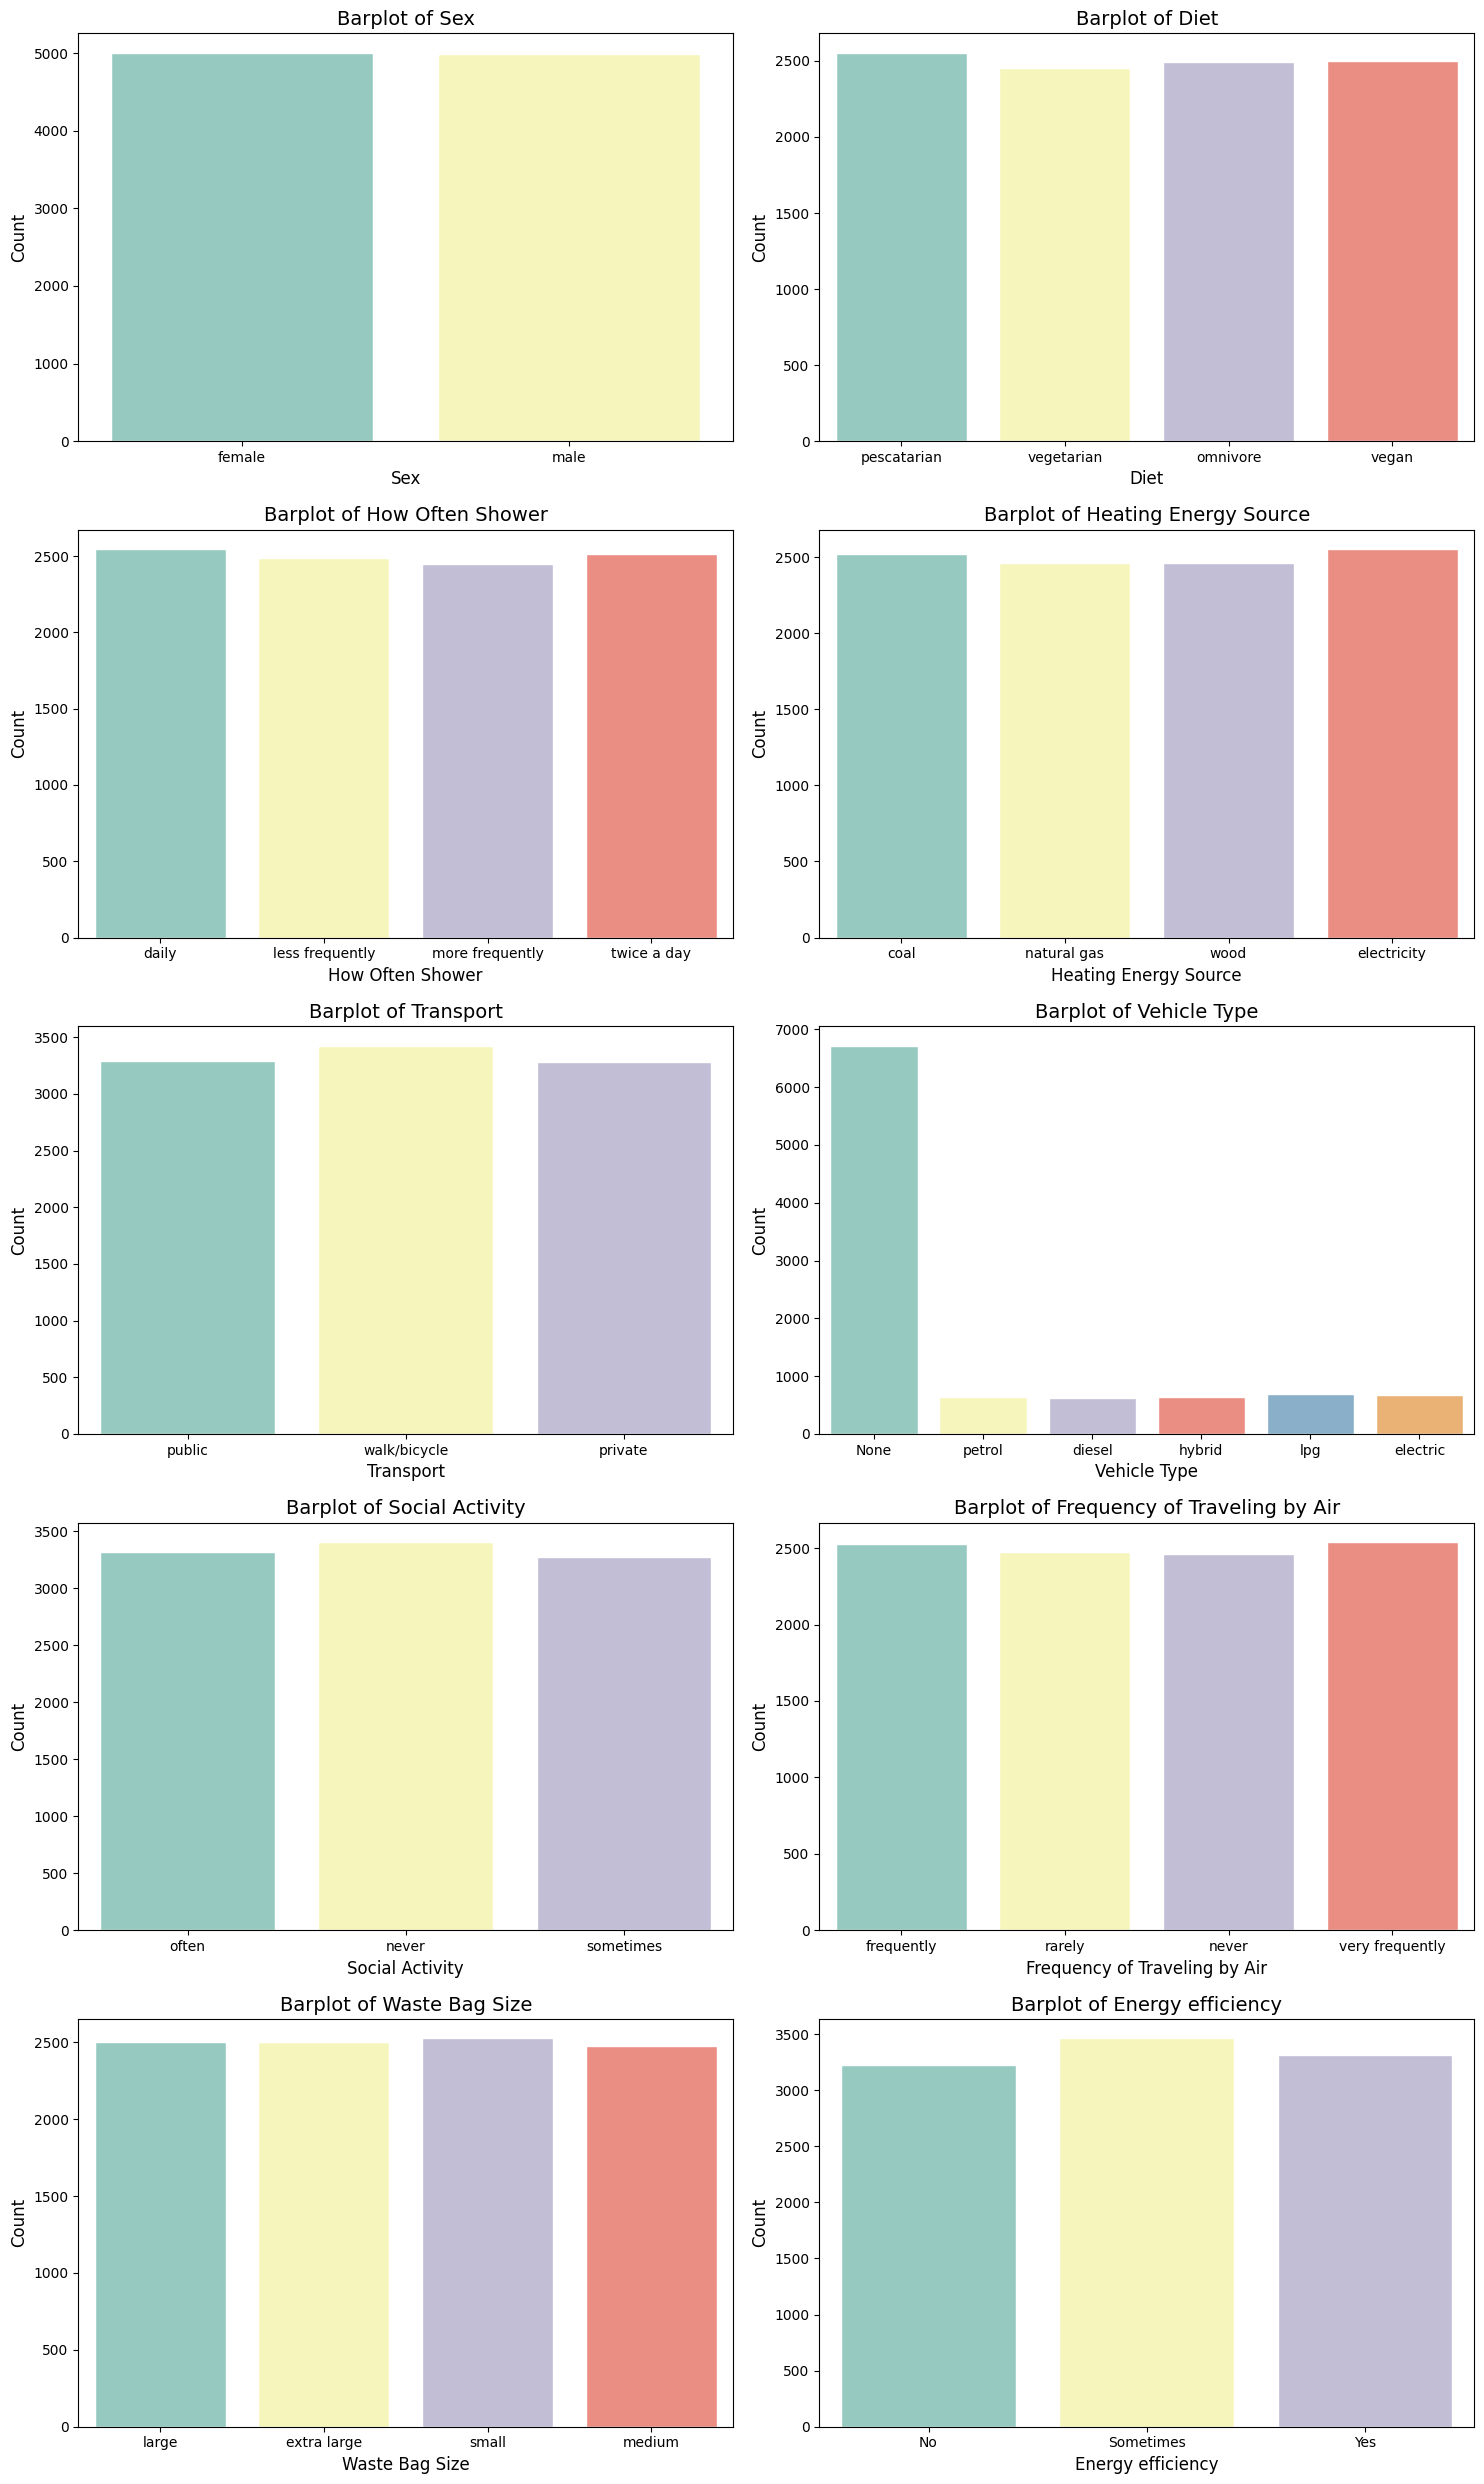

In [11]:
# Specify the columns I want to visualize
columns_to_visualize = ['Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity',
                       'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency']

# Set up the layout for the subplots
num_plots = len(columns_to_visualize)
num_cols = 2  # Number of columns in the layout
num_rows = -(-num_plots // num_cols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

sns.set(font='monospace')

sns.set_style('ticks')

# Iterate over each column and create a plot
for i, column in enumerate(columns_to_visualize):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    # Create the plot
    sns.countplot(x=dataset[column], ax=ax, palette="Set3")

    # Adding labels
    ax.set_title(f'Barplot of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [12]:
# Use Label Encoding for categorical variables
categorical_columns = dataset.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

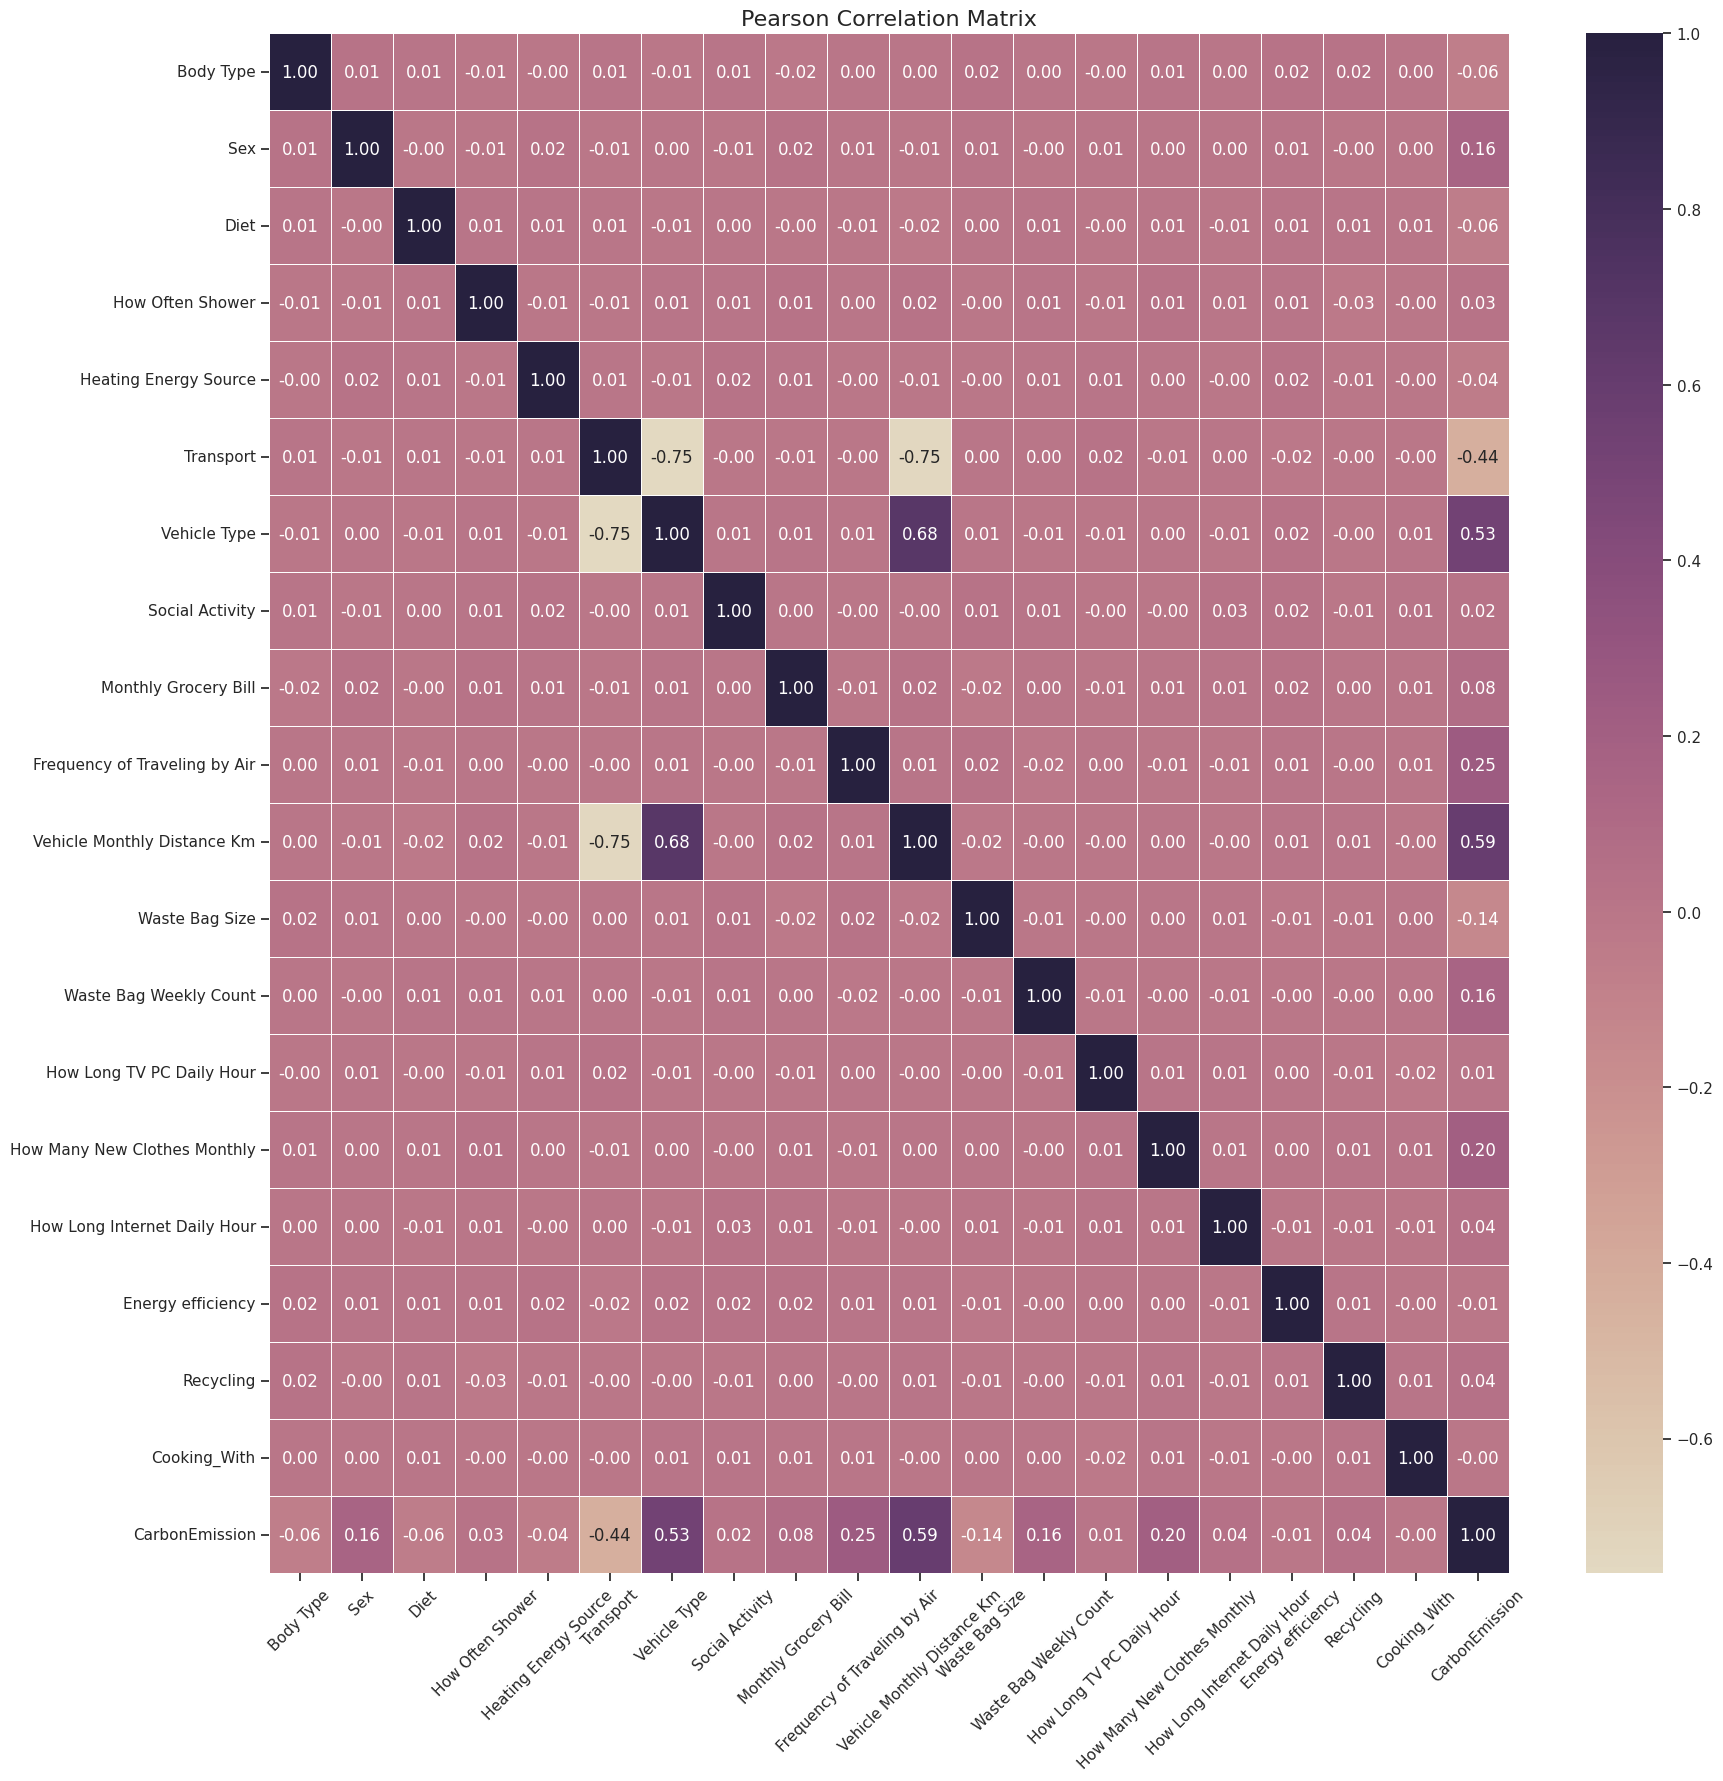

In [13]:
# Calculate the correlation matrix using Pearson correlation coefficient
correlation_matrix = dataset.corr(method='pearson')

# Plot the correlation matrix as a heatmap with colors
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

* The heatmap displays the correlation coefficients between pairs of variables in the dataset.
* Darker shades of purple represent positive correlations, while brighter shades of beige represent negative correlations.
* The closer the value is to 1 or -1, the stronger the correlation. Values close to 0 indicate weak or no correlation.

<span style="font-family: monospace; font-size: 16px;">

# <span style="font-weight: bold;">Random Forest Regression + Feature Importance</span> 🤖 <a class="anchor" id="chapter3"></a>

</span>

In [14]:
# Split the data into features and target variable
features = dataset.drop(columns=['CarbonEmission'])
target = dataset['CarbonEmission']

In [15]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(features, target)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [16]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.8077171676181152


The OOB score provides an estimate of the model's performance using unseen data during the training process. It serves as an internal validation metric for Random Forest models. A higher OOB score indicates better predictive performance. So, our 80% is quite good!

In [17]:
# Making predictions on the same data or new data
predictions = regressor.predict(features)

In [18]:
# Evaluating the model
mse = mean_squared_error(target, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(target, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 19493.369631
R-squared: 0.9811759994281349


MSE measures the average squared difference between the actual and predicted values of carbon emissions. In the context of our problem, it means that, on average, the model's predictions are closer to the actual carbon emission values.

R-squared measures the proportion of the variance in the target variable (carbon emissions) that is explained by the independent variables (features).
R^2 score ranges from 0 to 1, where 1 indicates that the model perfectly predicts the target variable and 0 indicates that the model does not explain any variability. In our case, a higher R^2 score indicates that a larger proportion of the variance in carbon emissions is explained by the features included in our model. So, our R^2 score is very good (98%).

In [19]:
# Feature importance
feature_importances = regressor.feature_importances_
feature_names = features.columns

In [20]:
# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [21]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

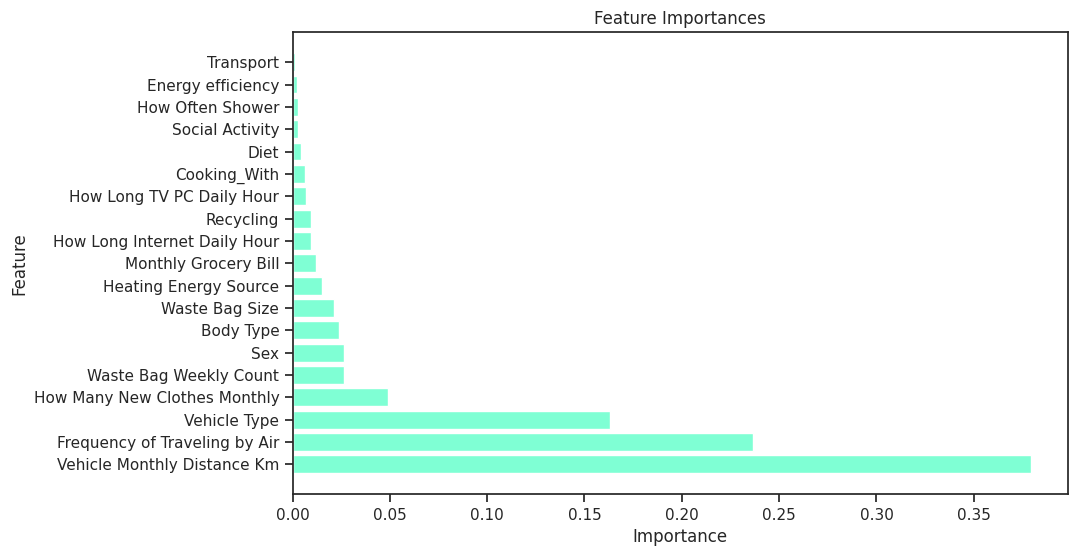

In [22]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

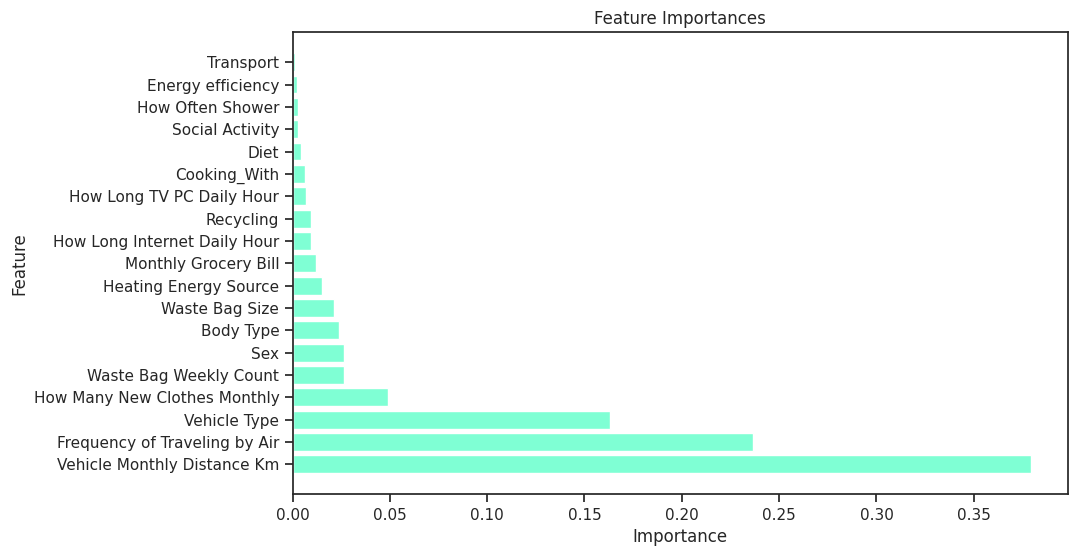

In [23]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='Aquamarine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

This table displays the feature importances for a set of features in our machine learning model. The importance indicates how much each feature contributes to the predictive power or outcome of the model. Here's an interpretation:
    

1. **Vehicle Monthly Distance Km:** This feature has the highest importance, indicating that the distance traveled by vehicles monthly significantly influences the model's predictions.

2. **Frequency of Traveling by Air:** The frequency of air travel also has a substantial impact on the model's predictions, although slightly lower than vehicle distance.

3. **Vehicle Type:** The type of vehicle (presumably referring to factors like car, bike, etc.) is also a significant factor in the model.

4. **How Many New Clothes Monthly:** This feature contributes less to the model's predictions compared to the top three features but still has some importance.

5. **Waste Bag Weekly Count:** The frequency of waste bag disposal on a weekly basis is another factor considered by the model.

6. **Sex:** Gender appears to have a small but noticeable impact on the model's predictions.

7. **Body Type:** Similarly, body type contributes to the model's predictions, though to a lesser extent than sex.

8. **Waste Bag Size:** The size of waste bags is also taken into account by the model, although its importance is relatively low compared to other features.

9. **Heating Energy Source:** The source of heating energy used has a minor impact on the model's predictions.

10. **Monthly Grocery Bill:** The amount spent on groceries each month also plays a role in the model's predictions, albeit a relatively small one.

11. **How Long Internet Daily Hour:** Daily internet usage duration has a slight influence on the model.

12. **Recycling:** Participation in recycling activities contributes somewhat to the model's predictions.

13. **How Long TV PC Daily Hour:** Daily duration of TV or PC usage is considered by the model, although its importance is relatively low.

14. **Cooking_With:** The method of cooking used also has a minor impact on the model.

15. **Diet:** Dietary habits contribute to the model's predictions, but their importance is relatively low compared to other features.

16. **Social Activity:** Engagement in social activities has a small influence on the model's predictions.

17. **How Often Shower:** Frequency of showering is considered by the model, though its importance is relatively low.

18. **Energy efficiency:** The energy efficiency of activities or appliances has a minimal impact on the model.

19. **Transport:** The mode of transportation used has the lowest importance among all the features considered by the model.